# Notebook for simulating MPMS data with a mixture of standard mineral phases in the rock magnetism bestiary

Low-temperature magentic remanence experiments are useful tools for qualitatively assessing existing magentic mienral phases and their characteristics in rock samples. However, it is almost always the case where a rock sample contains an assemblage of magnetic grains. This notebook presents a simple mixture function that can be used to simulate toy models of MPMS data with data from charaterized mineral standards developed at the IRM. The linear mixtures assume no interaction between the magnetic phases. The resultant **mass-normalized** remanence curves may serve as a useful tool for developing intuition about what mineral phases may dominate the remanence behavior with various mixing proportions.

In [1]:
import pmagpy.rockmag as rmag
import pmagpy.contribution_builder as cb
import pmagpy.ipmag as ipmag

from scipy.interpolate import interp1d
from ipywidgets import interact, widgets, FloatSlider
from IPython.display import display

## load rock magnetism bestiary data from the MagIC database

The Rock Magnetic Bestiary (RMB) is a curated collection of rock magnetic data developed at the Institute for Rock Magnetism (IRM) focused on well-characterized synthetic and natural materials. Inspired by medieval bestiaries that cataloged natural entities through allegorical descriptions, the Rock Magnetic Bestiary aims to facilitate the interpretation of the magnetic properties of natural samples by comparison with detailed reference datasets.

A series of standard mineral species have rock magnetism data available in the MagIC database:
1) Titanomagnetites: 
2) Titanohematites: 
3) Oxyhydroxides: https://earthref.org/MagIC/20427
4) Sulfides: 
5) Carbonates: https://earthref.org/MagIC/20384


### carbonates

In [2]:
# set the MagIC ID for the data set here
magic_id = '20384'

# set where you want the downloaded data to go
dir_path = 'example_data/'+magic_id

result, magic_file = ipmag.download_magic_from_id(magic_id, directory=dir_path)
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
carbonates_cb = cb.Contribution(dir_path)
carbonates_specimens = carbonates_cb.tables['specimens'].df
carbonates_measurements = carbonates_cb.tables['measurements'].df

Download successful. File saved to: example_data/20384/magic_contribution_20384.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/contribution.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/locations.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/sites.txt
3  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/samples.txt
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/specimens.txt
1243  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20384/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


### Oxyhydroxides

In [3]:
# set the MagIC ID for the data set here
magic_id = '20427'

# set where you want the downloaded data to go
dir_path = 'example_data/'+magic_id

result, magic_file = ipmag.download_magic_from_id(magic_id, directory=dir_path)
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
oxyhydroxides_cb = contribution = cb.Contribution(dir_path)
oxyhydroxides_specimens = oxyhydroxides_cb.tables['specimens'].df
oxyhydroxides_measurements = oxyhydroxides_cb.tables['measurements'].df

Download successful. File saved to: example_data/20427/magic_contribution_20427.txt
1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/contribution.txt
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/locations.txt
6  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/sites.txt
84  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/samples.txt
85  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/specimens.txt
3800  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/MPMS_notebooks/example_data/20427/measurements.txt


## extract MPMS data from the rock magnetism bestiary

Dropdown(description='Specimen 1:', options=('siderite_Dalizi-YP-01', 'siderite_Roman-01', 'siderite_unk-01'),…

Dropdown(description='Specimen 2:', options=('ferroxyhyte_Princeton-1985-M1-1', 'ferroxyhyte_Princeton-1985-M2…

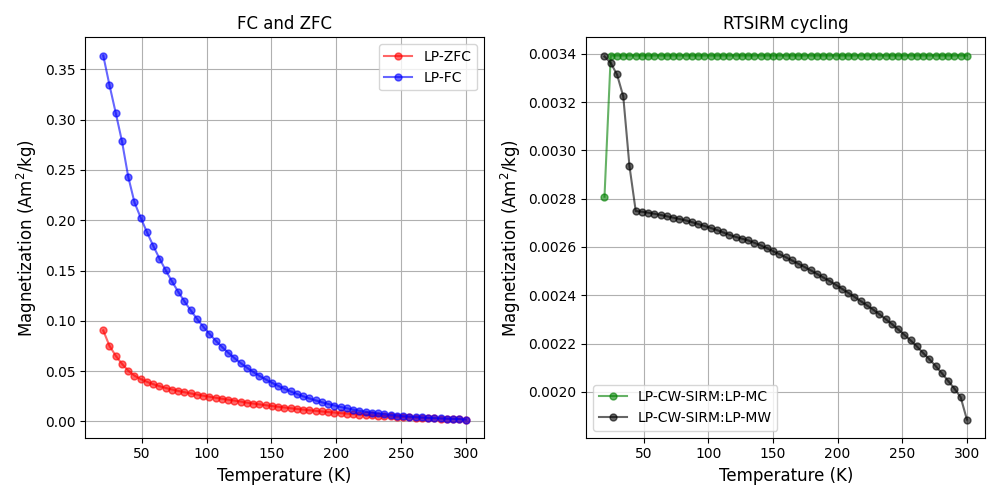

In [4]:
%matplotlib widget
rmag.MPMS_signal_blender_interactive(carbonates_measurements, oxyhydroxides_measurements,
                                experiments=['LP-ZFC', 'LP-FC', 'LP-CW-SIRM:LP-MC', 'LP-CW-SIRM:LP-MW'],
                                figsize=(10, 5))